In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [29]:
Bank = pd.read_csv("/content/bank_data.csv")

In [30]:
Bank

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


Check missing

In [6]:
# get the number of missing data points per column
missing_values_count = Bank.isnull().sum()
missing_values_count

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

check for dublicated data

In [7]:
duplicateRows = Bank[Bank.duplicated()]
duplicateRows

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex


TypeError: ignored

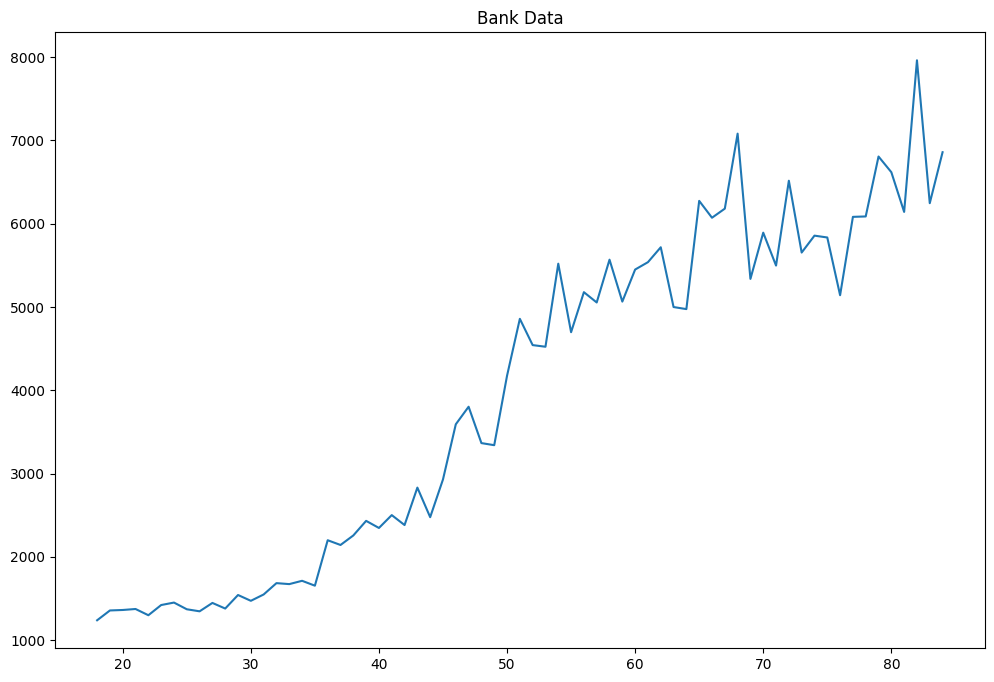

In [27]:
# Create a line plot for 'expected_recovery_amount'
plt.figure(figsize=(12, 8))
plt.title("Bank Data")
sns.lineplot(x='age', y='expected_recovery_amount', data=Bank, label='Expected Recovery Amount')

# Add a line plot for 'actual_recovery_amount' with a different color and linestyle
sns.lineplot(x='age', y='actual_recovery_amount', data=Bank, label='Actual Recovery Amount', color='red', linestyle='--')

plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)

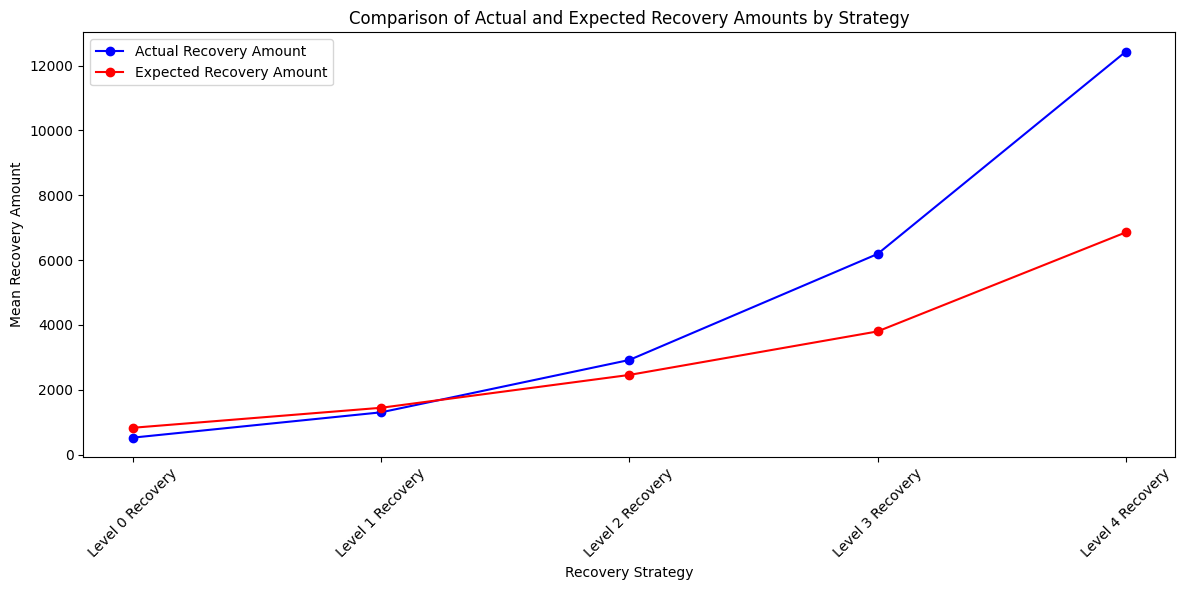

In [9]:
# Group the data by recovery strategy and calculate the mean actual and expected recovery amounts for each strategy
strategy_data = Bank.groupby('recovery_strategy')[['actual_recovery_amount', 'expected_recovery_amount']].mean().reset_index()

# Create a line plot to compare actual and expected recovery amounts by strategy
plt.figure(figsize=(12, 6))
plt.plot(strategy_data['recovery_strategy'], strategy_data['actual_recovery_amount'], marker='o', linestyle='-', color='b', label='Actual Recovery Amount')
plt.plot(strategy_data['recovery_strategy'], strategy_data['expected_recovery_amount'], marker='o', linestyle='-', color='r', label='Expected Recovery Amount')
plt.title('Comparison of Actual and Expected Recovery Amounts by Strategy')
plt.xlabel('Recovery Strategy')
plt.ylabel('Mean Recovery Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

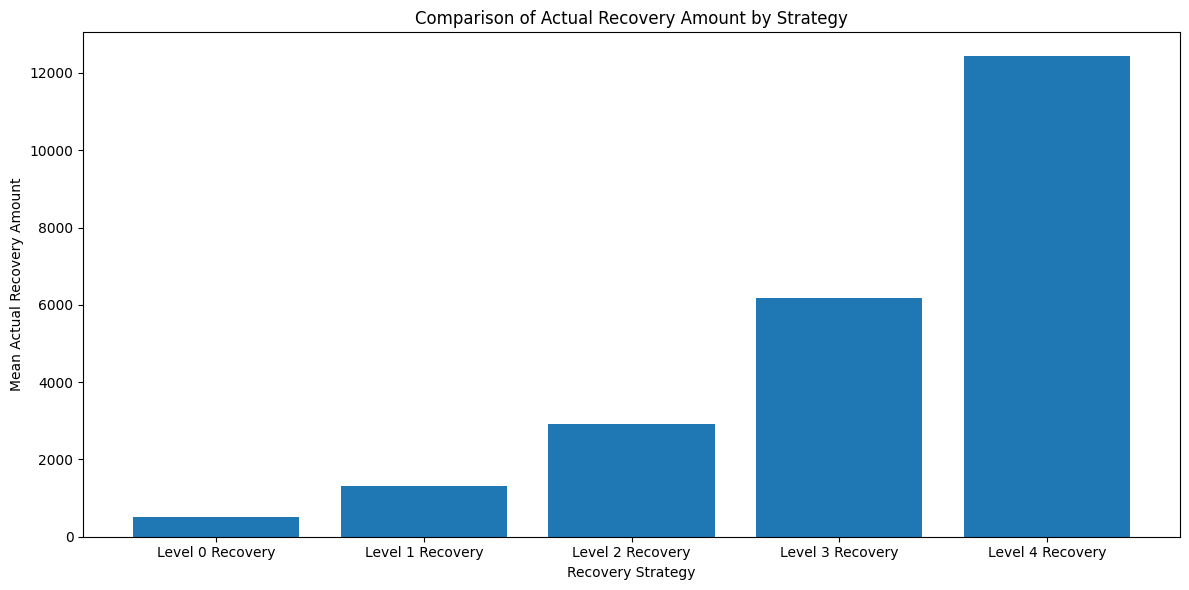

In [10]:
# Group the data by recovery strategy and calculate the mean actual recovery amount for each strategy
strategy_data = Bank.groupby('recovery_strategy')['actual_recovery_amount'].mean().reset_index()

# Create a bar plot to compare actual recovery amount by strategy
plt.figure(figsize=(12, 6))
plt.bar(strategy_data['recovery_strategy'], strategy_data['actual_recovery_amount'])
plt.title('Comparison of Actual Recovery Amount by Strategy')
plt.xlabel('Recovery Strategy')
plt.ylabel('Mean Actual Recovery Amount')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

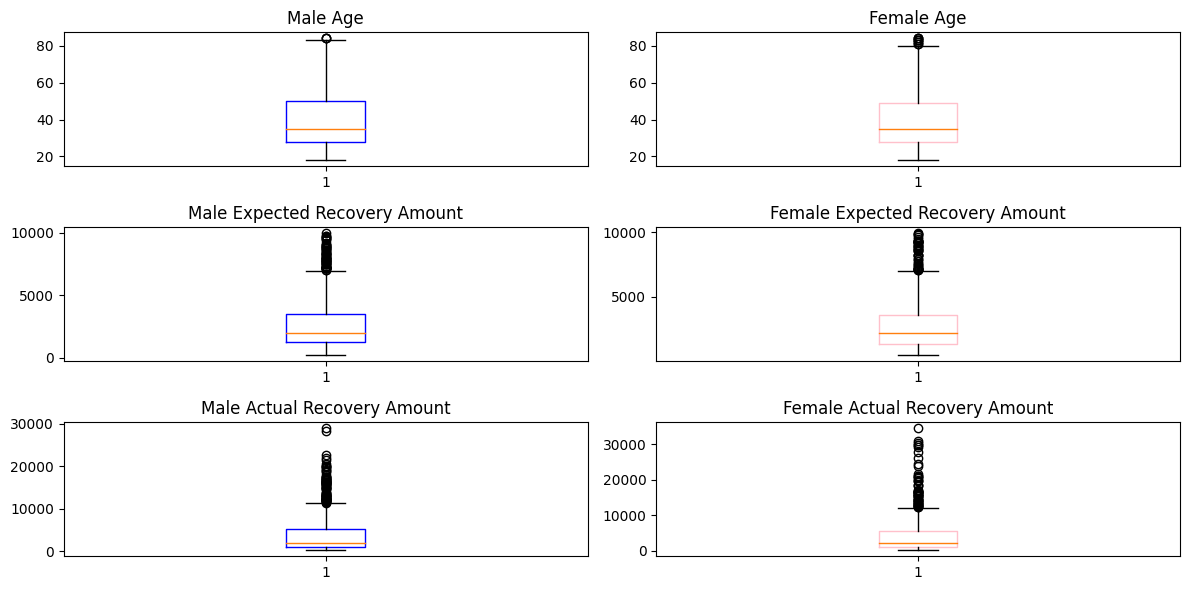

In [11]:

data = Bank
fig, ax = plt.subplots(3, 2, figsize=(12, 6))

Fig1 = [data['age'][data.sex == 'Male']]
Fig2 = [data['age'][data.sex == 'Female']]

Fig3 = [data['expected_recovery_amount'][data.sex == 'Male']]
Fig4 = [data['expected_recovery_amount'][data.sex == 'Female']]

Fig5 = [data['actual_recovery_amount'][data.sex == 'Male']]
Fig6 = [data['actual_recovery_amount'][data.sex == 'Female']]


boxplot1 = ax[0,0].boxplot(Fig1)
plt.setp(boxplot1['boxes'][0],color='blue')
ax[0,0].set_title('Male Age')

boxplot2 = ax[0,1].boxplot(Fig2)
plt.setp(boxplot2['boxes'][0],color='pink')
ax[0,1].set_title('Female Age')

boxplot3 = ax[1,0].boxplot(Fig3)
plt.setp(boxplot3['boxes'][0],color='blue')
ax[1,0].set_title('Male Expected Recovery Amount')

boxplot4 = ax[1,1].boxplot(Fig4)
plt.setp(boxplot4['boxes'][0],color='pink')
ax[1,1].set_title('Female Expected Recovery Amount')

boxplot5 = ax[2,0].boxplot(Fig5)
plt.setp(boxplot5['boxes'][0],color='blue')
ax[2,0].set_title('Male Actual Recovery Amount')

boxplot6 = ax[2,1].boxplot(Fig6)
plt.setp(boxplot6['boxes'][0],color='pink')
ax[2,1].set_title('Female Actual Recovery Amount')

plt.tight_layout()
plt.show()


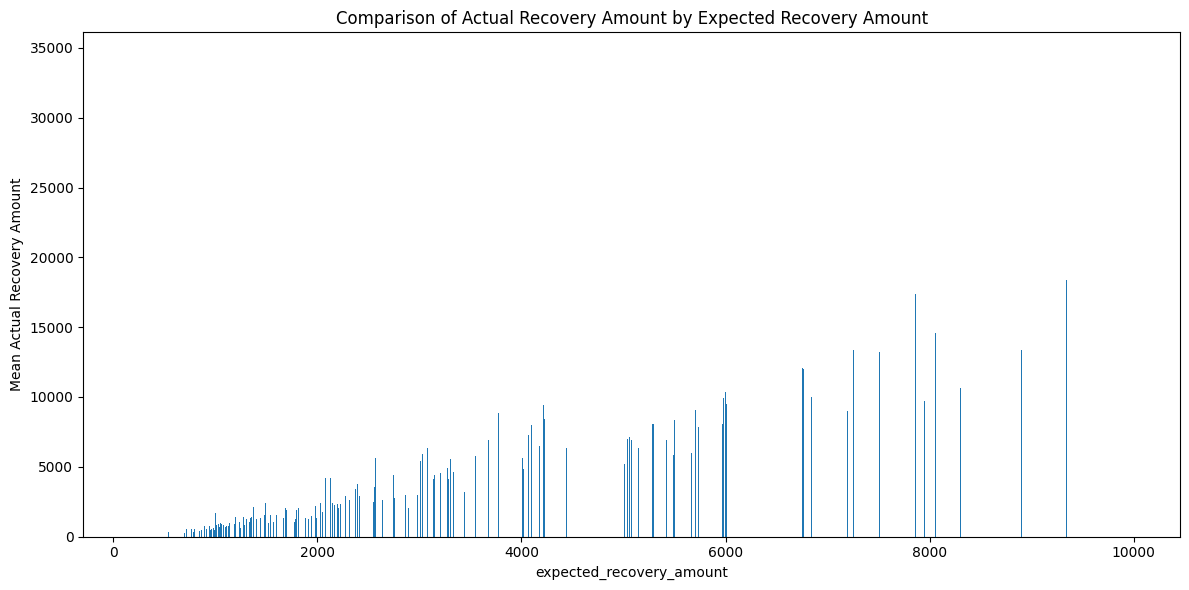

In [12]:
# Group the data by recovery strategy and calculate the mean actual recovery amount for each strategy
strategy_data = Bank.groupby('expected_recovery_amount')['actual_recovery_amount'].mean().reset_index()

# Create a bar plot to compare actual recovery amount by strategy
plt.figure(figsize=(12, 6))
plt.bar(strategy_data['expected_recovery_amount'], strategy_data['actual_recovery_amount'])
plt.title('Comparison of Actual Recovery Amount by Expected Recovery Amount')
plt.xlabel('expected_recovery_amount')
plt.ylabel('Mean Actual Recovery Amount')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

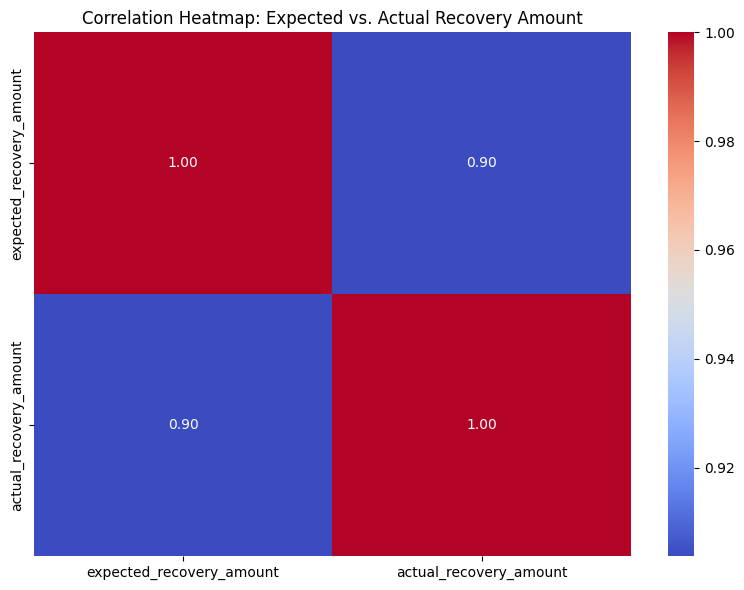

In [13]:
# Select the relevant columns for correlation analysis
correlation_data = Bank[['expected_recovery_amount', 'actual_recovery_amount']]

# Create a correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Expected vs. Actual Recovery Amount')
plt.tight_layout()
plt.show()

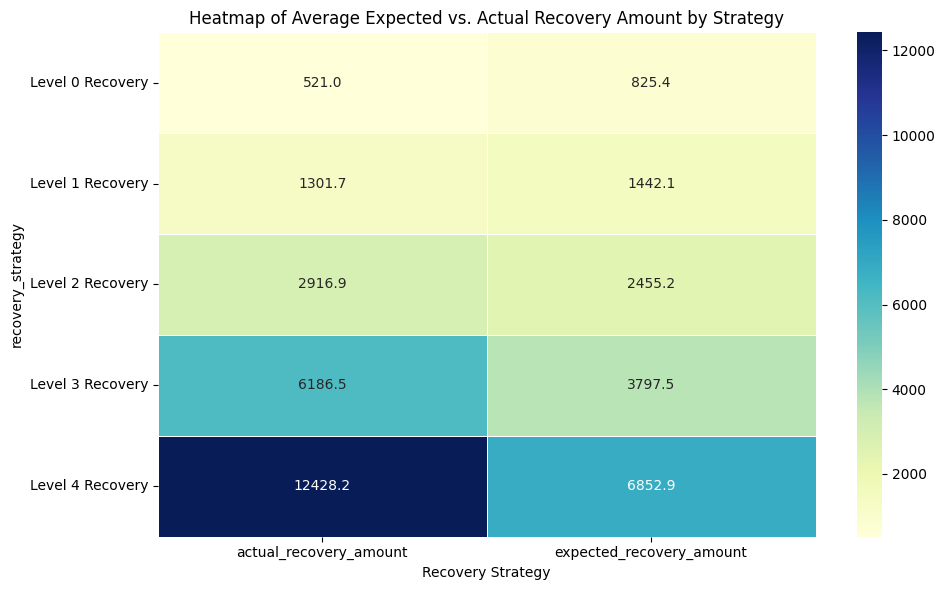

In [14]:
# Create a pivot table with recovery_strategy as the index, and both expected_recovery_amount and actual_recovery_amount as values
pivot_table = Bank.pivot_table(values=['expected_recovery_amount', 'actual_recovery_amount'], index='recovery_strategy', aggfunc='mean')

# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Add title
plt.title("Heatmap of Average Expected vs. Actual Recovery Amount by Strategy")

# Create a heatmap
sns.heatmap(data=pivot_table, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.5)

# Add label for horizontal axis
plt.xlabel("Recovery Strategy")

# Show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Expected Recovery Amount')

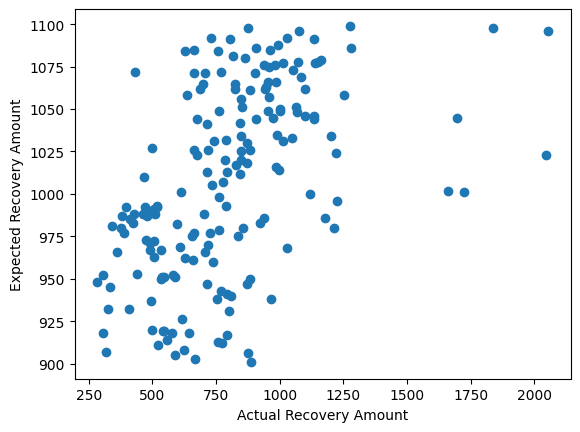

In [15]:
data_filtered = Bank[(Bank['expected_recovery_amount'] < 1100) & (Bank['expected_recovery_amount'] > 900)]
plt.scatter(data_filtered['actual_recovery_amount'],data_filtered['expected_recovery_amount'])
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')

In [16]:
count = len(data_filtered)
Average = len(data_filtered[data_filtered['sex']=='Male'])/count * 100
average_rounded = round(Average, 2)
print('Male Precentage at The threshold between 900 and 1100 ' + str(average_rounded) + '%' )

Male Precentage at The threshold between 900 and 1100 61.11%


In [17]:
import scipy.stats as stats

# Define threshold values
actual_threshold = 1000
expected_lower_threshold = 900
expected_upper_threshold = 1100
expected_lower_threshold2 = 950
expected_upper_threshold2 = 1050

# Filter the data based on the thresholds
data_filtered = Bank[
    (Bank['actual_recovery_amount'] < actual_threshold) &
    (Bank['expected_recovery_amount'] > expected_lower_threshold) &
    (Bank['expected_recovery_amount'] < expected_upper_threshold)
]

# Create two samples based on the thresholds
sample1 = data_filtered[
    (data_filtered['expected_recovery_amount'] > expected_lower_threshold) &
    (data_filtered['expected_recovery_amount'] < expected_upper_threshold)
]

sample2 = data_filtered[
    (data_filtered['expected_recovery_amount'] > expected_lower_threshold2) &
    (data_filtered['expected_recovery_amount'] < expected_upper_threshold2)
]

# Perform the Kruskal-Wallis test
statistic, p_value = stats.kruskal(sample1, sample2)

# Define significance level (alpha)
alpha = 0.05

# Print results
print("Kruskal-Wallis Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

# Determine if null hypothesis is rejected
if (p_value < alpha).any():
    print("Reject the null hypothesis: There are significant differences between the samples.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the samples.")



Kruskal-Wallis Test:
Test statistic: [0.18183912 0.00734908 1.70952836 0.42352647 0.38779882 0.49678879]
p-value: [0.66979747 0.9316836  0.19104657 0.51518263 0.53345871 0.48091451]
Fail to reject the null hypothesis: There are no significant differences between the samples.


In [18]:
print(Bank.columns)

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')


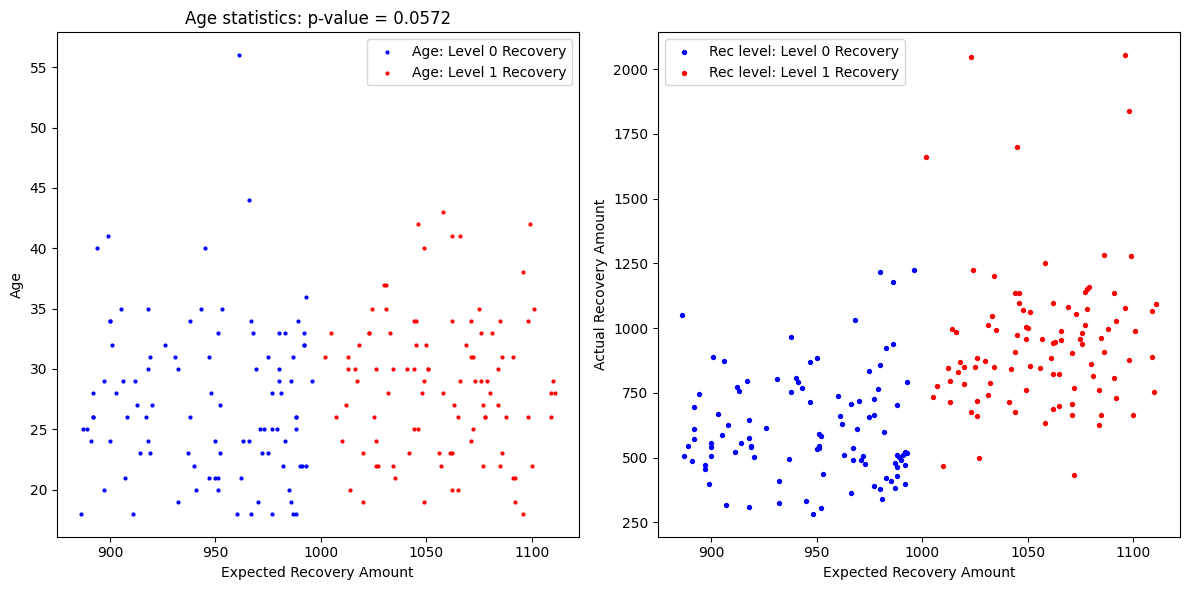


Statistics for Level 0 Recovery-Level 1 Recovery
Age statistics (Kruskal-Wallis Test): p-value = 0.0572
Upper bound Level 0 Recovery mean:
sex
Female    26.945946
Male      27.442623
Name: age, dtype: Float64
Lower bound Level 1 Recovery mean:
sex
Female    27.595238
Male           29.5
Name: age, dtype: Float64
Chi-square P-value of sex groups: 0.5602


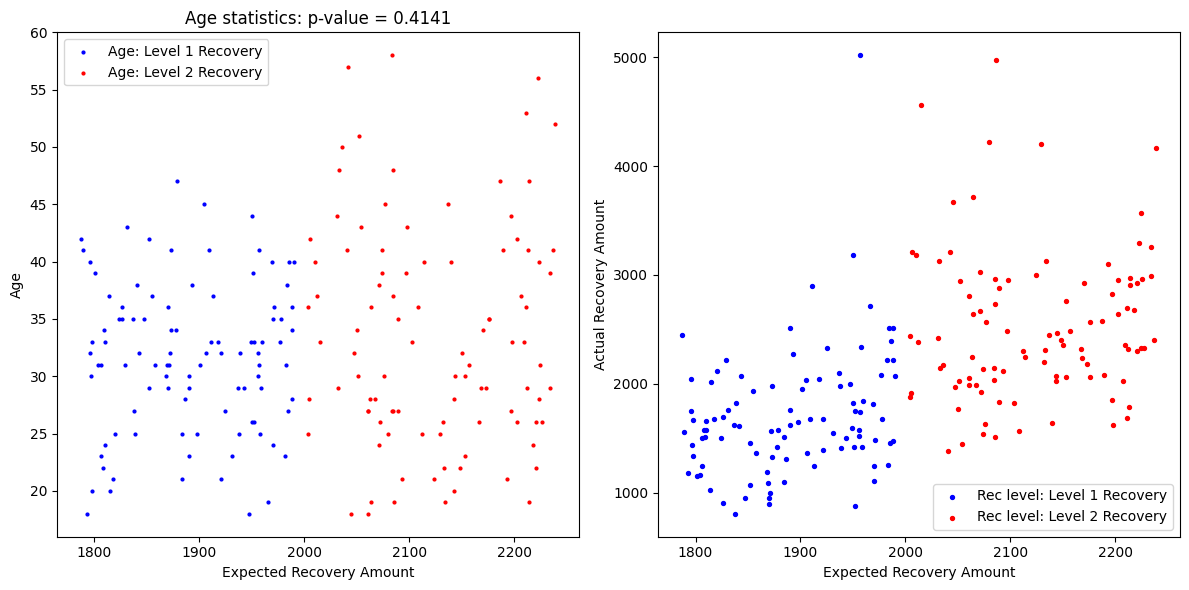


Statistics for Level 1 Recovery-Level 2 Recovery
Age statistics (Kruskal-Wallis Test): p-value = 0.4141
Upper bound Level 1 Recovery mean:
sex
Female    30.021277
Male      33.117647
Name: age, dtype: Float64
Lower bound Level 2 Recovery mean:
sex
Female    32.085106
Male      34.666667
Name: age, dtype: Float64
Chi-square P-value of sex groups: 1.0000


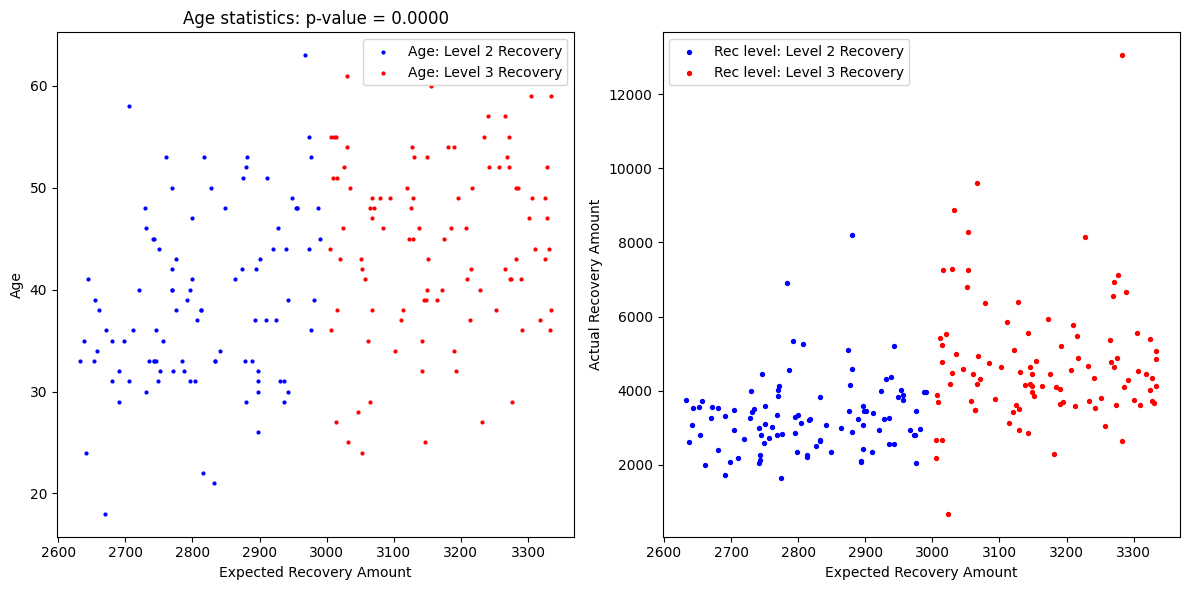


Statistics for Level 2 Recovery-Level 3 Recovery
Age statistics (Kruskal-Wallis Test): p-value = 0.0000
Upper bound Level 2 Recovery mean:
sex
Female      39.16
Male      38.1875
Name: age, dtype: Float64
Lower bound Level 3 Recovery mean:
sex
Female    44.446809
Male      44.294118
Name: age, dtype: Float64
Chi-square P-value of sex groups: 0.7751


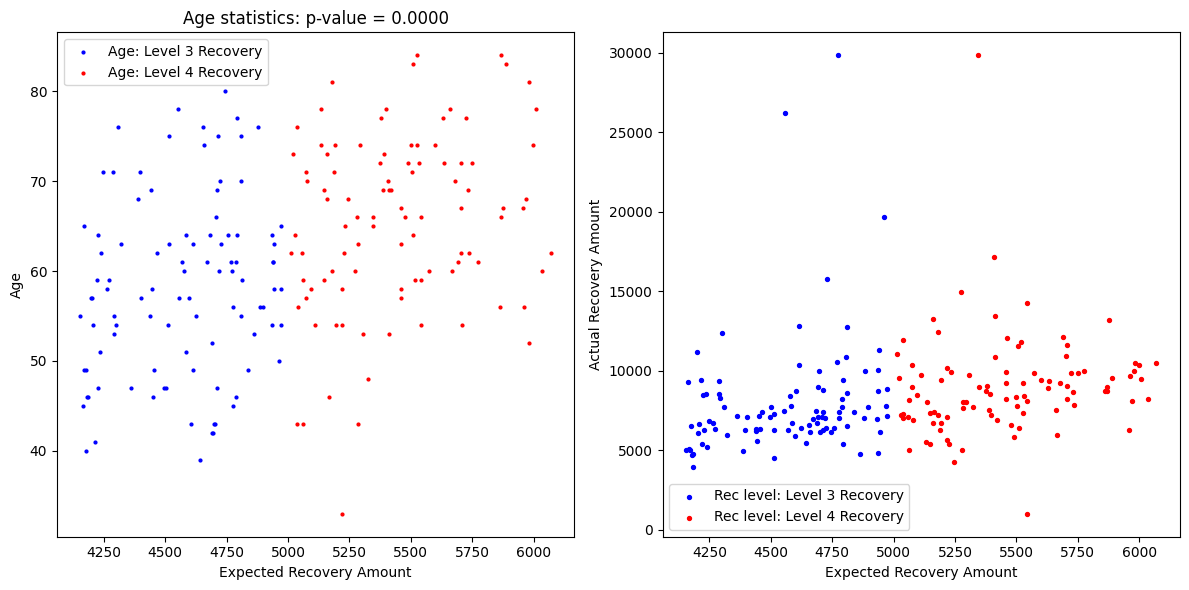


Statistics for Level 3 Recovery-Level 4 Recovery
Age statistics (Kruskal-Wallis Test): p-value = 0.0000
Upper bound Level 3 Recovery mean:
sex
Female    56.471698
Male      59.933333
Name: age, dtype: Float64
Lower bound Level 4 Recovery mean:
sex
Female    63.075472
Male      68.111111
Name: age, dtype: Float64
Chi-square P-value of sex groups: 1.0000


In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the CSV file
Bank = pd.read_csv("/content/bank_data.csv", dtype={'sex': str, 'age': pd.Int64Dtype()})

# Set the index
df = Bank.set_index(['recovery_strategy', 'id'])
rec_labels = df.index.get_level_values(0).unique()

# Define parameters
diff_up = 2
diff_down = 100

# Loop through recovery strategies
for i in range(len(rec_labels) - 1):
    low_var_data = df.loc[rec_labels[i]].sort_values('expected_recovery_amount', ascending=False)
    high_var_data = df.loc[rec_labels[i + 1]].sort_values('expected_recovery_amount', ascending=True)

    # Age statistics
    age_low = low_var_data['age'][diff_up:diff_down]
    age_high = high_var_data['age'][diff_up:diff_down]
    kruskal_statistic, kruskal_pval = stats.kruskal(age_low, age_high)

    # Scatterplot for Age vs. Expected Recovery Amount
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(low_var_data['expected_recovery_amount'][diff_up:diff_down], age_low, c="b", s=4, label='Age: ' + rec_labels[i])
    plt.scatter(high_var_data['expected_recovery_amount'][diff_up:diff_down], age_high, c="r", s=4, label='Age: ' + rec_labels[i + 1])
    plt.xlabel('Expected Recovery Amount')
    plt.ylabel('Age')
    plt.legend()
    plt.title('Age statistics: p-value = {:.4f}'.format(kruskal_pval))

    # Scatterplot for Expected vs. Actual Recovery Amount
    plt.subplot(1, 2, 2)
    plt.scatter(low_var_data['expected_recovery_amount'][diff_up:diff_down], low_var_data['actual_recovery_amount'][diff_up:diff_down], c="b", s=8, label='Rec level: ' + rec_labels[i])
    plt.scatter(high_var_data['expected_recovery_amount'][diff_up:diff_down], high_var_data['actual_recovery_amount'][diff_up:diff_down], c="r", s=8, label='Rec level: ' + rec_labels[i + 1])
    plt.xlabel('Expected Recovery Amount')
    plt.ylabel('Actual Recovery Amount')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Age and sex group statistics
    sex_age_low = low_var_data['age'][diff_up:diff_down]
    sex_age_high = high_var_data['age'][diff_up:diff_down]

    sex_group_stats_low = sex_age_low.groupby(df.loc[rec_labels[i]]['sex']).mean()
    sex_group_stats_high = sex_age_high.groupby(df.loc[rec_labels[i + 1]]['sex']).mean()

    # Chi-square test for sex groups
    crosstab = pd.concat([sex_age_low.groupby(df.loc[rec_labels[i]]['sex']).count(), sex_age_high.groupby(df.loc[rec_labels[i + 1]]['sex']).count()], axis='columns')
    chi2_stat, p_val, _, _ = stats.chi2_contingency(crosstab)

    print('\nStatistics for {}-{}'.format(rec_labels[i], rec_labels[i + 1]))
    print('Age statistics (Kruskal-Wallis Test): p-value = {:.4f}'.format(kruskal_pval))
    print('Upper bound {} mean:\n{}'.format(rec_labels[i], sex_group_stats_low))
    print('Lower bound {} mean:\n{}'.format(rec_labels[i + 1], sex_group_stats_high))
    print('Chi-square P-value of sex groups: {:.4f}'.format(p_val))


Model Summary:
                               OLS Regression Results                               
Dep. Variable:     expected_recovery_amount   R-squared:                       0.817
Model:                                  OLS   Adj. R-squared:                  0.817
Method:                       Least Squares   F-statistic:                     8378.
Date:                      Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                              22:48:23   Log-Likelihood:                -15397.
No. Observations:                      1882   AIC:                         3.080e+04
Df Residuals:                          1880   BIC:                         3.081e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

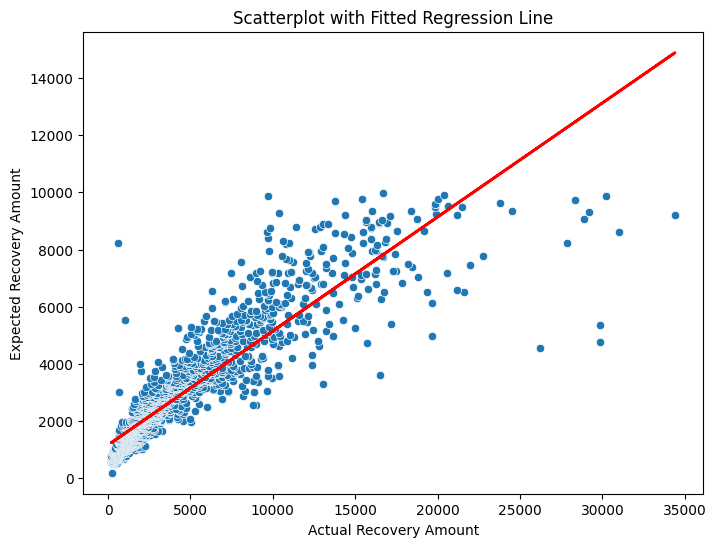

In [20]:
import statsmodels.api as sm
y = Bank['expected_recovery_amount']
X = Bank['actual_recovery_amount']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print("Model Summary:")
print(model1.summary())
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_recovery_amount', y='expected_recovery_amount', data=Bank)
plt.plot(X['actual_recovery_amount'], model1.predict(X), color='red', linewidth=2)
plt.title("Scatterplot with Fitted Regression Line")
plt.xlabel("Actual Recovery Amount")
plt.ylabel("Expected Recovery Amount")
plt.show()

Model Summary:
                               OLS Regression Results                               
Dep. Variable:     expected_recovery_amount   R-squared:                       0.810
Model:                                  OLS   Adj. R-squared:                  0.810
Method:                       Least Squares   F-statistic:                     6408.
Date:                      Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                              22:48:24   Log-Likelihood:                -12309.
No. Observations:                      1505   AIC:                         2.462e+04
Df Residuals:                          1503   BIC:                         2.463e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

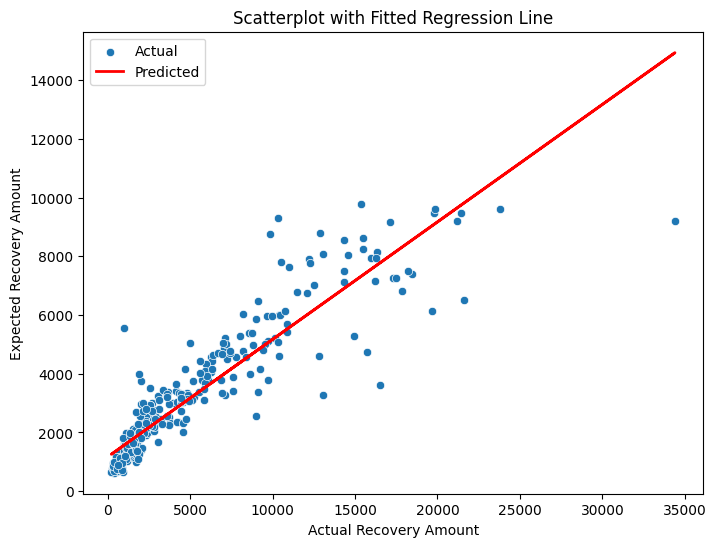

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
y = Bank['expected_recovery_amount']
X = Bank['actual_recovery_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print("Model Summary:")
print(model.summary())

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['actual_recovery_amount'], y=y_test, label="Actual")
plt.plot(X_test['actual_recovery_amount'], y_pred, color='red', linewidth=2, label="Predicted")
plt.title("Scatterplot with Fitted Regression Line")
plt.xlabel("Actual Recovery Amount")
plt.ylabel("Expected Recovery Amount")
plt.legend()
plt.show()

Decision Tree Regression Model Evaluation:
R-squared (R2): 0.78


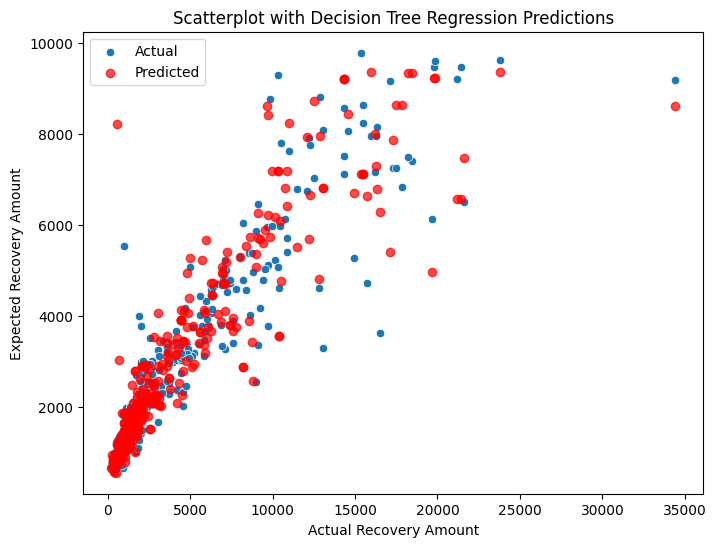

In [22]:

from sklearn.tree import DecisionTreeRegressor
y = Bank['expected_recovery_amount']
X = Bank['actual_recovery_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train.values.reshape(-1, 1), y_train)

y_pred = model.predict(X_test.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression Model Evaluation:")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test, y=y_test, label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted", alpha=0.7)
plt.title("Scatterplot with Decision Tree Regression Predictions")
plt.xlabel("Actual Recovery Amount")
plt.ylabel("Expected Recovery Amount")
plt.legend()
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train.values.reshape(-1, 1), y_train)

y_gb_pred = gb_model.predict(X_test.values.reshape(-1, 1))

gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print("Gradient Boosting Regression Model Evaluation:")
print(f"R-squared (R2): {gb_r2:.2f}")

Gradient Boosting Regression Model Evaluation:
R-squared (R2): 0.87


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.values.reshape(-1, 1), y_train)

y_rf_pred = rf_model.predict(X_test.values.reshape(-1, 1))

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("Random Forest Regression Model Evaluation:")
print(f"R-squared (R2): {rf_r2:.2f}")


Random Forest Regression Model Evaluation:
R-squared (R2): 0.83


In [25]:
# # temp low and high
# from sklearn.tree import DecisionTreeRegressor
# temp_low_var = df.loc[rec_labels[i],['expected_recovery_amount','actual_recovery_amount']].reset_index()\
#     .sort_values('expected_recovery_amount', ascending=False)[:diff_var]
#     temp_high_var = df.loc[rec_labels[i+1],['expected_recovery_amount','actual_recovery_amount']].reset_index()\
#     .sort_values('expected_recovery_amount', ascending=True)[:diff_var]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = DecisionTreeRegressor(random_state=42)
# model.fit(X_train.values.reshape(-1, 1), y_train)

# y_pred = model.predict(X_test.values.reshape(-1, 1))

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Decision Tree Regression Model Evaluation:")
# print(f"R-squared (R2): {r2:.2f}")

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X_test, y=y_test, label="Actual")
# plt.scatter(X_test, y_pred, color='red', label="Predicted", alpha=0.7)
# plt.title("Scatterplot with Decision Tree Regression Predictions")
# plt.xlabel("Actual Recovery Amount")
# plt.ylabel("Expected Recovery Amount")
# plt.legend()
# plt.show()